# DFS And BFS With Real Life Application

The Real life application or example I have used here is of friends connection list present in most of the social media applications present these days such as Facebook or LinkedIn. Here the graph consist of nodes which represent people and an edge between then which represented that they are connected with each other. If an edge exist starting at person A and ending at Person B then A is friend of B (or A is connected with B). We can use this graph and find out how two people are related to each other using the searching algorithms DFS and BFS.

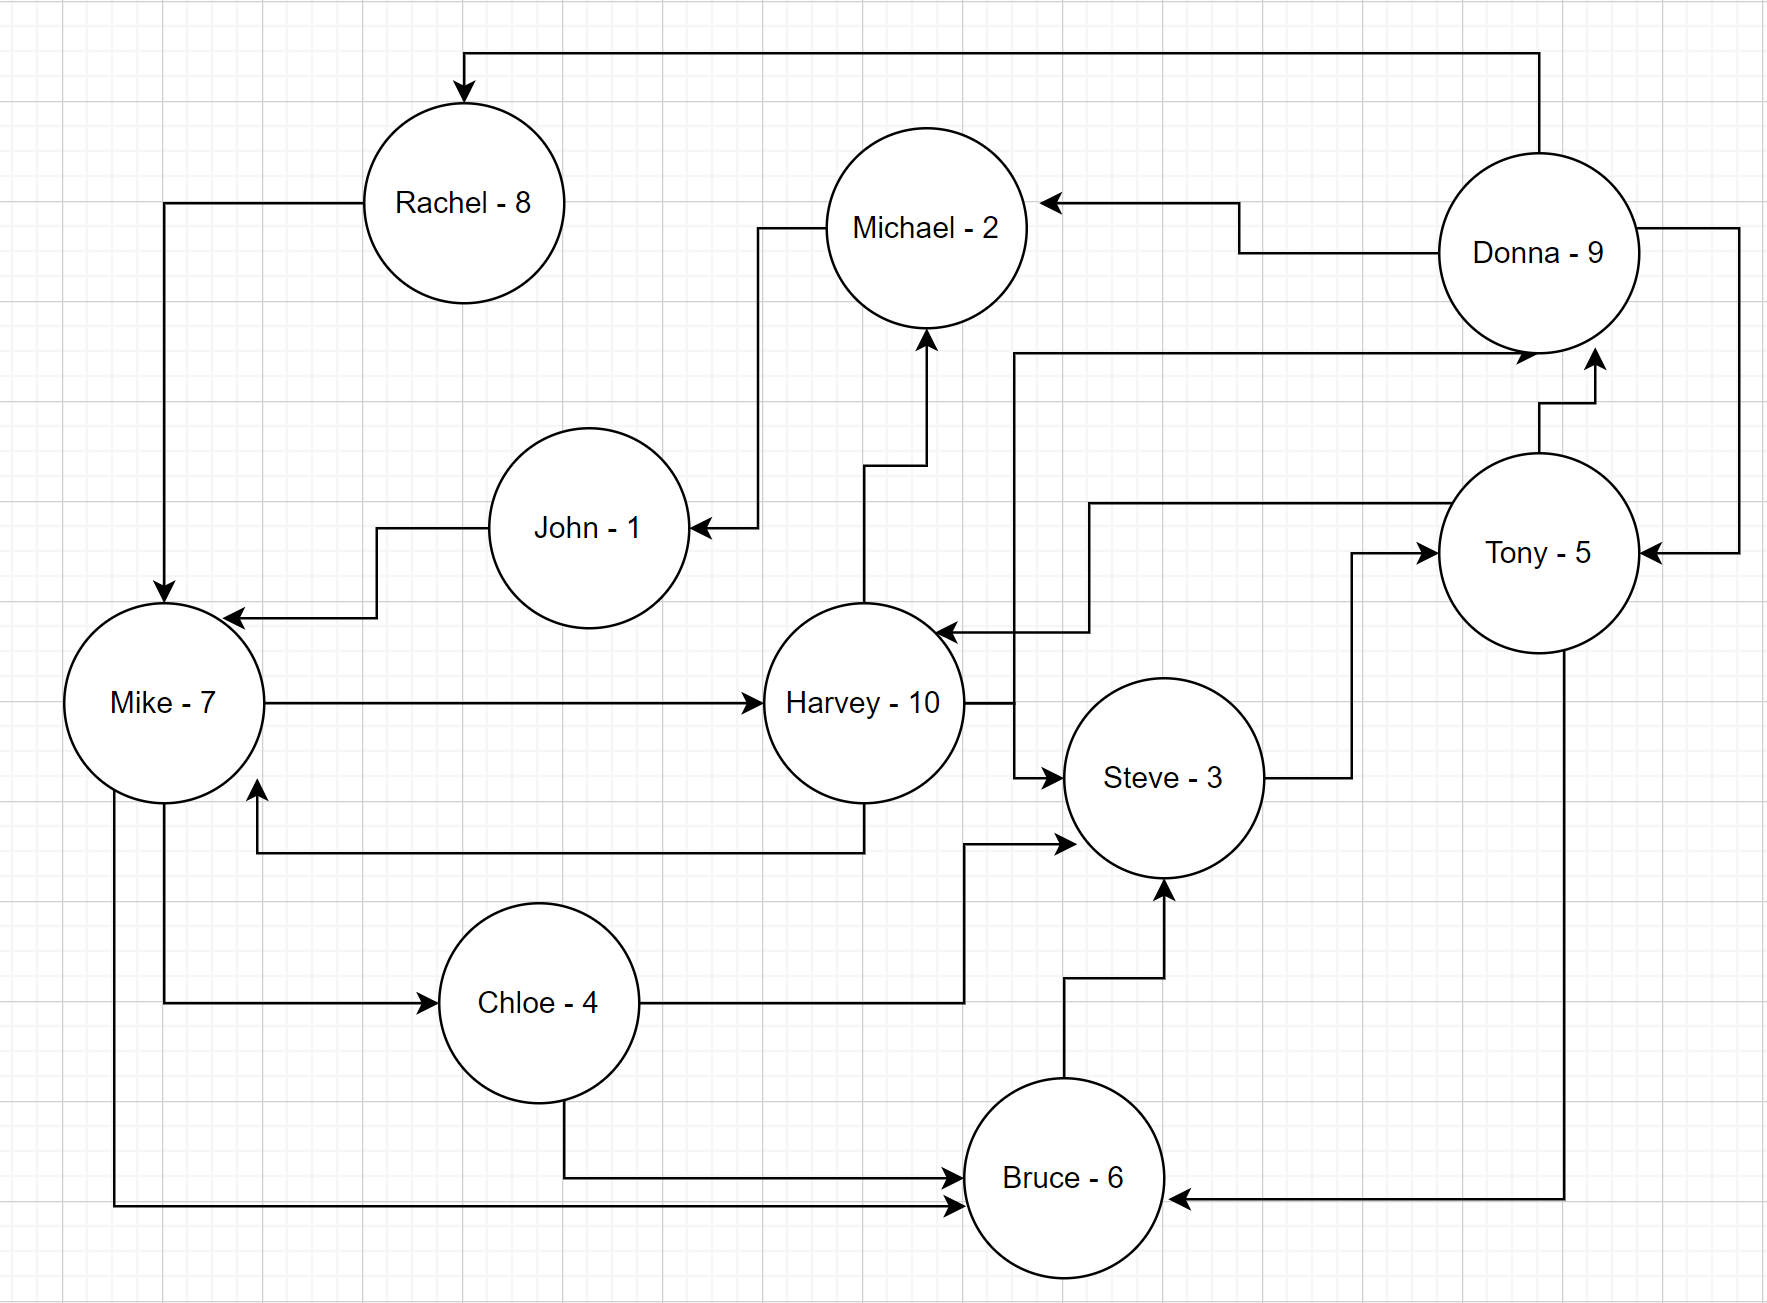

In [1]:
# We will store our graph in form of an adjacency matrix and we will have a seperate dictionary which will have the required
# mapping of person name along with its index.

G = [[0,0,0,0,0,0,1,0,0,0],
     [1,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,1,0,0,0,0,0],
     [0,0,1,0,0,1,0,0,0,0],
     [0,0,0,0,0,1,0,0,1,1],
     [0,0,1,0,0,0,0,0,0,0],
     [0,0,0,1,0,1,0,0,0,1],
     [0,0,0,0,0,0,1,0,0,0],
     [0,1,0,0,1,0,0,1,0,0],
     [0,1,1,0,0,0,1,0,1,0],]

relation = {0: "John", 1: "Michael", 2: "Steve", 3: "Chloe", 4: "Tony", 
             5: "Bruce", 6: "Mike", 7: "Rachel", 8: "Donna", 9: "Harvey"}

## Breadth First Search

In [2]:
# We will be using Queue data structure to implement BFS

class Queue:
    def __init__(self, size):
        self.top = -1
        self.beg = -1
        self.size= size
        self.arr = [0]*size
        
    def isFull(self):
        if(self.top == self.size):
            return True
        return False
    
    def isEmpty(self):
        if(self.top == -1):
            return True
        return False
    
    def enQueue(self, data):
        if(self.isFull()):
            print("Stack is Full.")
        else:
            self.top += 1
            self.arr[self.top] = data
    
    def deQueue(self):
        if(self.isEmpty()):
            print("Queue is empty.")
        else:
            self.beg += 1
            temp = self.arr[self.beg]
            if(self.beg > self.top):
                self.top = -1
                self.beg = -1
            return temp

In [3]:
def breadthFirstSearch(G, n, start, end):
    explored = [0]*n
    q = Queue(30)
    q.enQueue(start)
    path = []
    while(not q.isEmpty()):
        p = q.deQueue()
        if(not explored[p]):
            path.append(p)
            explored[p] = 1
            for i in range(0,n):
                if(G[p][i] == 1):
                    q.enQueue(i)
            if(p == end):
                return path
    return -1

def printPath(path, relation):
    for i in range(0, len(path)):
        if(i != len(path)-1):
            print(relation[path[i]], end="->")
        else:
            print(relation[path[i]])

In [4]:
path = breadthFirstSearch(G, 10, 9, 3)
printPath(path, relation)

Harvey->Michael->Steve->Mike->Donna->John->Tony->Chloe


As this is breadth first search, We will start with our start node and search all its neighbours first and only then move the neigbhours of our first child. So we first start with Harvey and add all its child in the queue (Michael, Steve, Mike, Donna). Now go to the first child from front i.e Michael and add its children (Steve, Mike, Donna, John). Now go to Steve and add its children (Mike, Donna, John, Tony). Then Mike and add Chole to list along with bruce. Then we go to Donna and add Rachel (dont add michael ad already visited) so the list is (John , Tony, Chloe, Bruce, Rachel). Next we have John and Then Tony (No need to add their childeren as already visited) And Finally we end at Chloe.

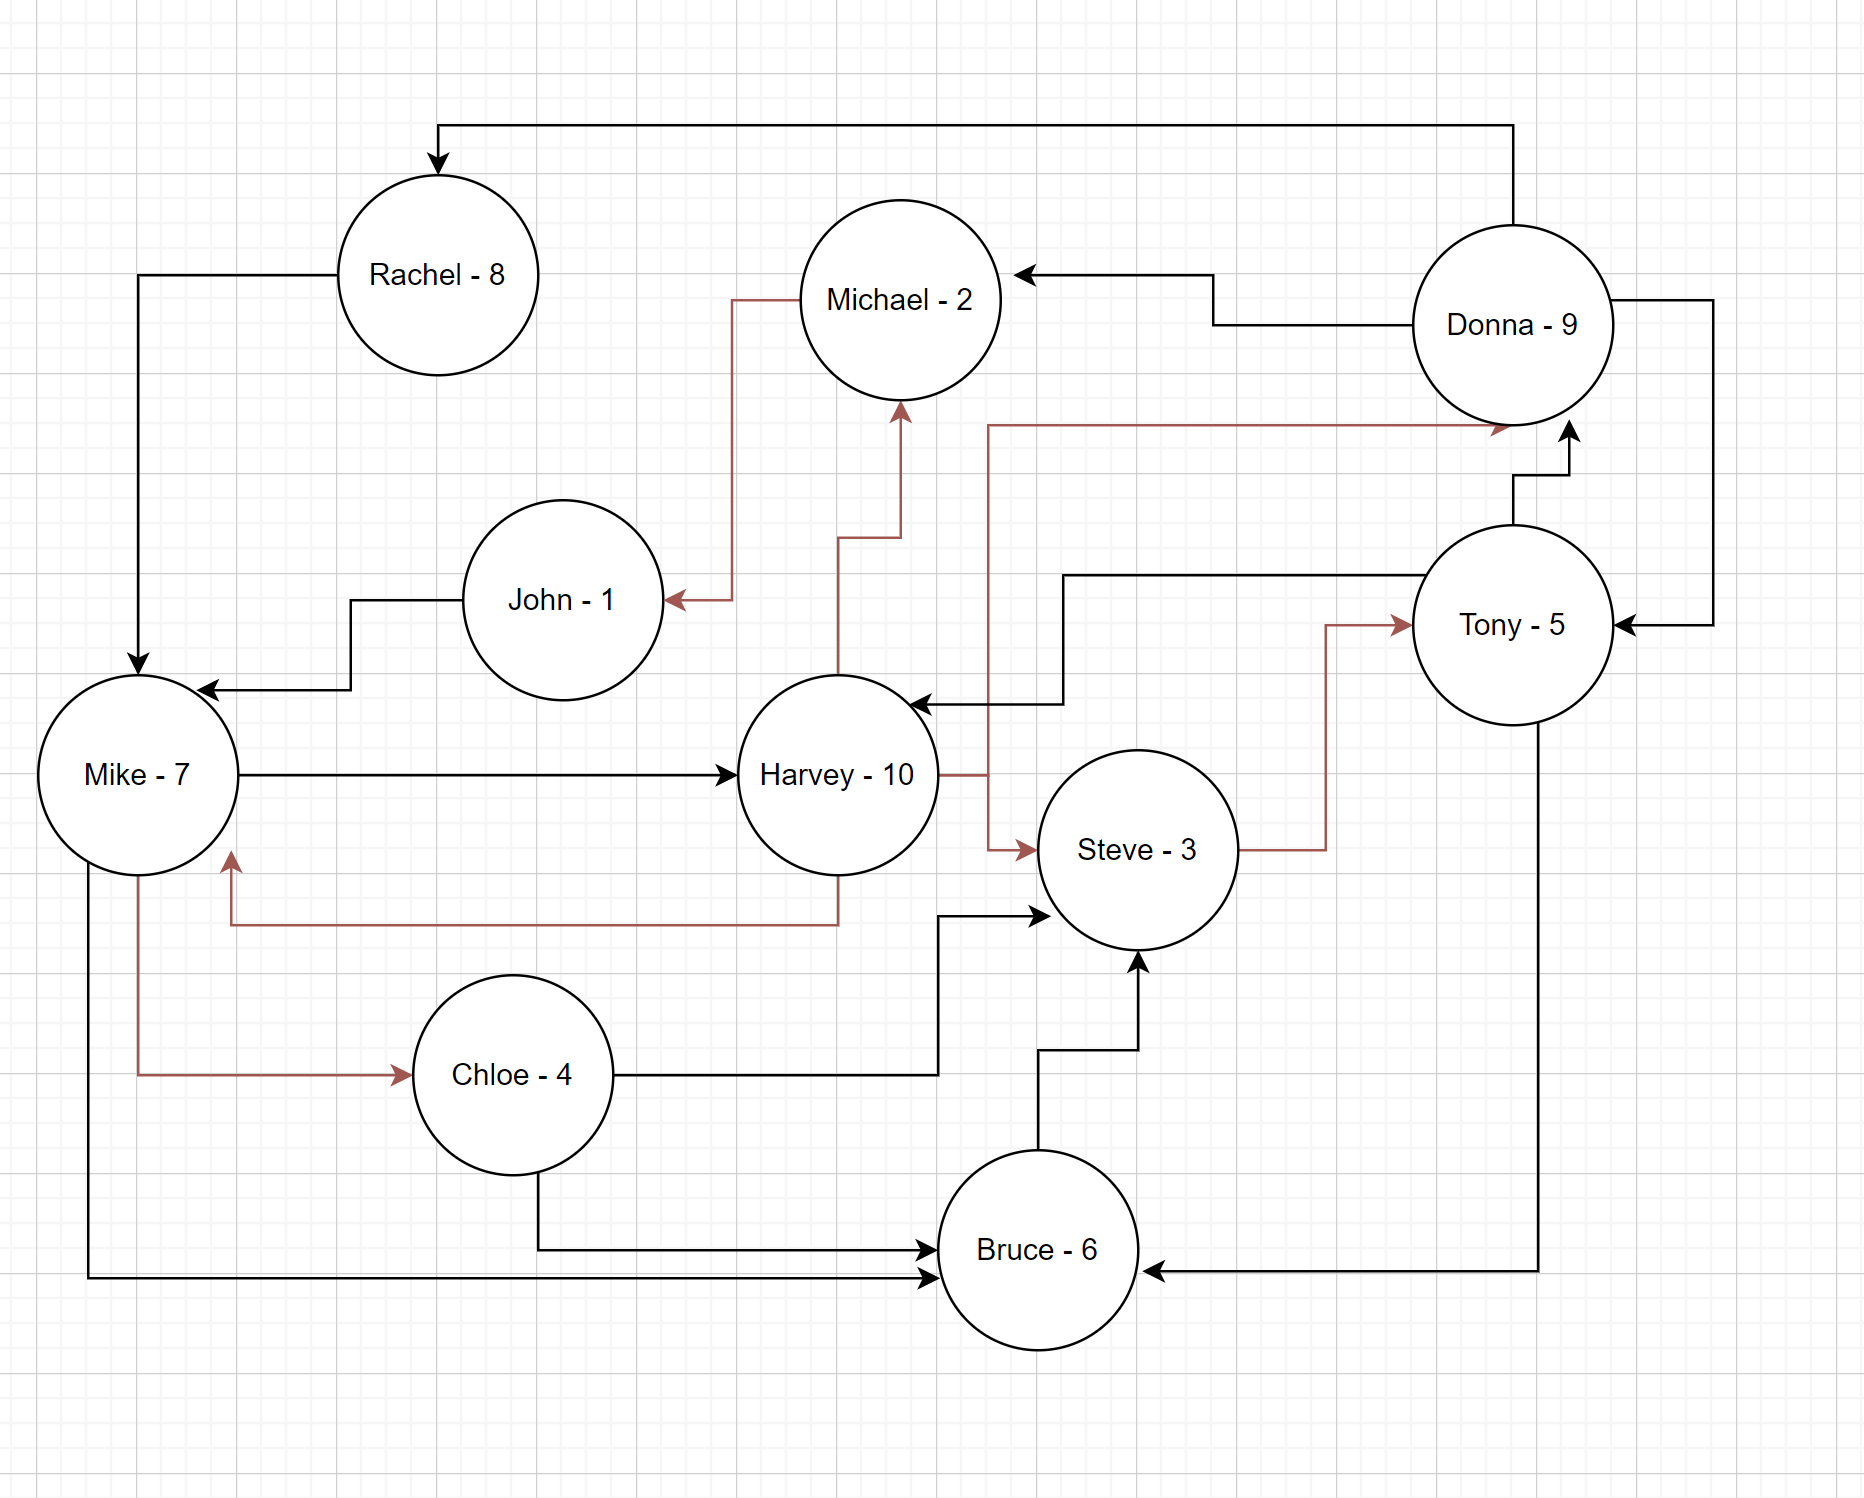

## Depth First Search

In [5]:
# Here we will be using Stack Data structure to implement DFS.

class Stack:
    def __init__(self, size):
        self.top = -1
        self.size = size
        self.arr = [0]*size
    
    def isEmpty(self):
        if(self.top == -1):
            return True
        return False
    
    def isFull(self):
        if(self.top == self.size):
            return True
        return False
    
    def push(self, data):
        if(self.isFull()):
            print("The Stack is Full.")
        else:
            self.top += 1
            self.arr[self.top] = data
    
    def pop(self):
        if(self.isEmpty()):
            print("Stack is Empty.")
        else:
            temp = self.arr[self.top]
            self.top -= 1
            return temp

In [6]:
def depthFirstSearch(G, n, start, end):
    explored = [0]*n
    s = Stack(20)
    s.push(start)
    path = []
    while(not s.isEmpty()):
        p = s.pop()
        if(not explored[p]):
            path.append(p)
            explored[p] = 1
            for i in range(0, n):
                if(G[p][i] == 1):
                    s.push(i)
            if(p == end):
                return path
    return -1

def printPath(path, relation):
    for i in range(0, len(path)):
        if(i != len(path)-1):
            print(relation[path[i]], end="->")
        else:
            print(relation[path[i]])

In [7]:
path = depthFirstSearch(G, 10, 9, 3)
printPath(path, relation)

Harvey->Donna->Rachel->Mike->Bruce->Steve->Tony->Chloe


Now in deapth first search we will go to the maximum depth first (i.e child's child till possible) and then backtrack. We will be using a Stack data structure for this. We first start with the given node Harvey. Then add all its children to the stack (Donna, Steve, Michael). Then pop the first element out and then push its children on to the stack. So we will get Donna out and our stack will look like this (Rachel, Tony, Steve, Michael). we keep doing this till we reach our required goal / final node. So next we get Rachel and stack will be (Mike, Tony, Steve, Michael). Then Mike will be removed and stack will have (Bruce, Chloe, Tony, Steve, Michael). Pop Bruce and add Steve. Now we pop Steve and add Tony stack will have (Tony, Chloe, Tony, Steve, Michael). Now pop off Tony and Chole. We wont print rest as already visited.

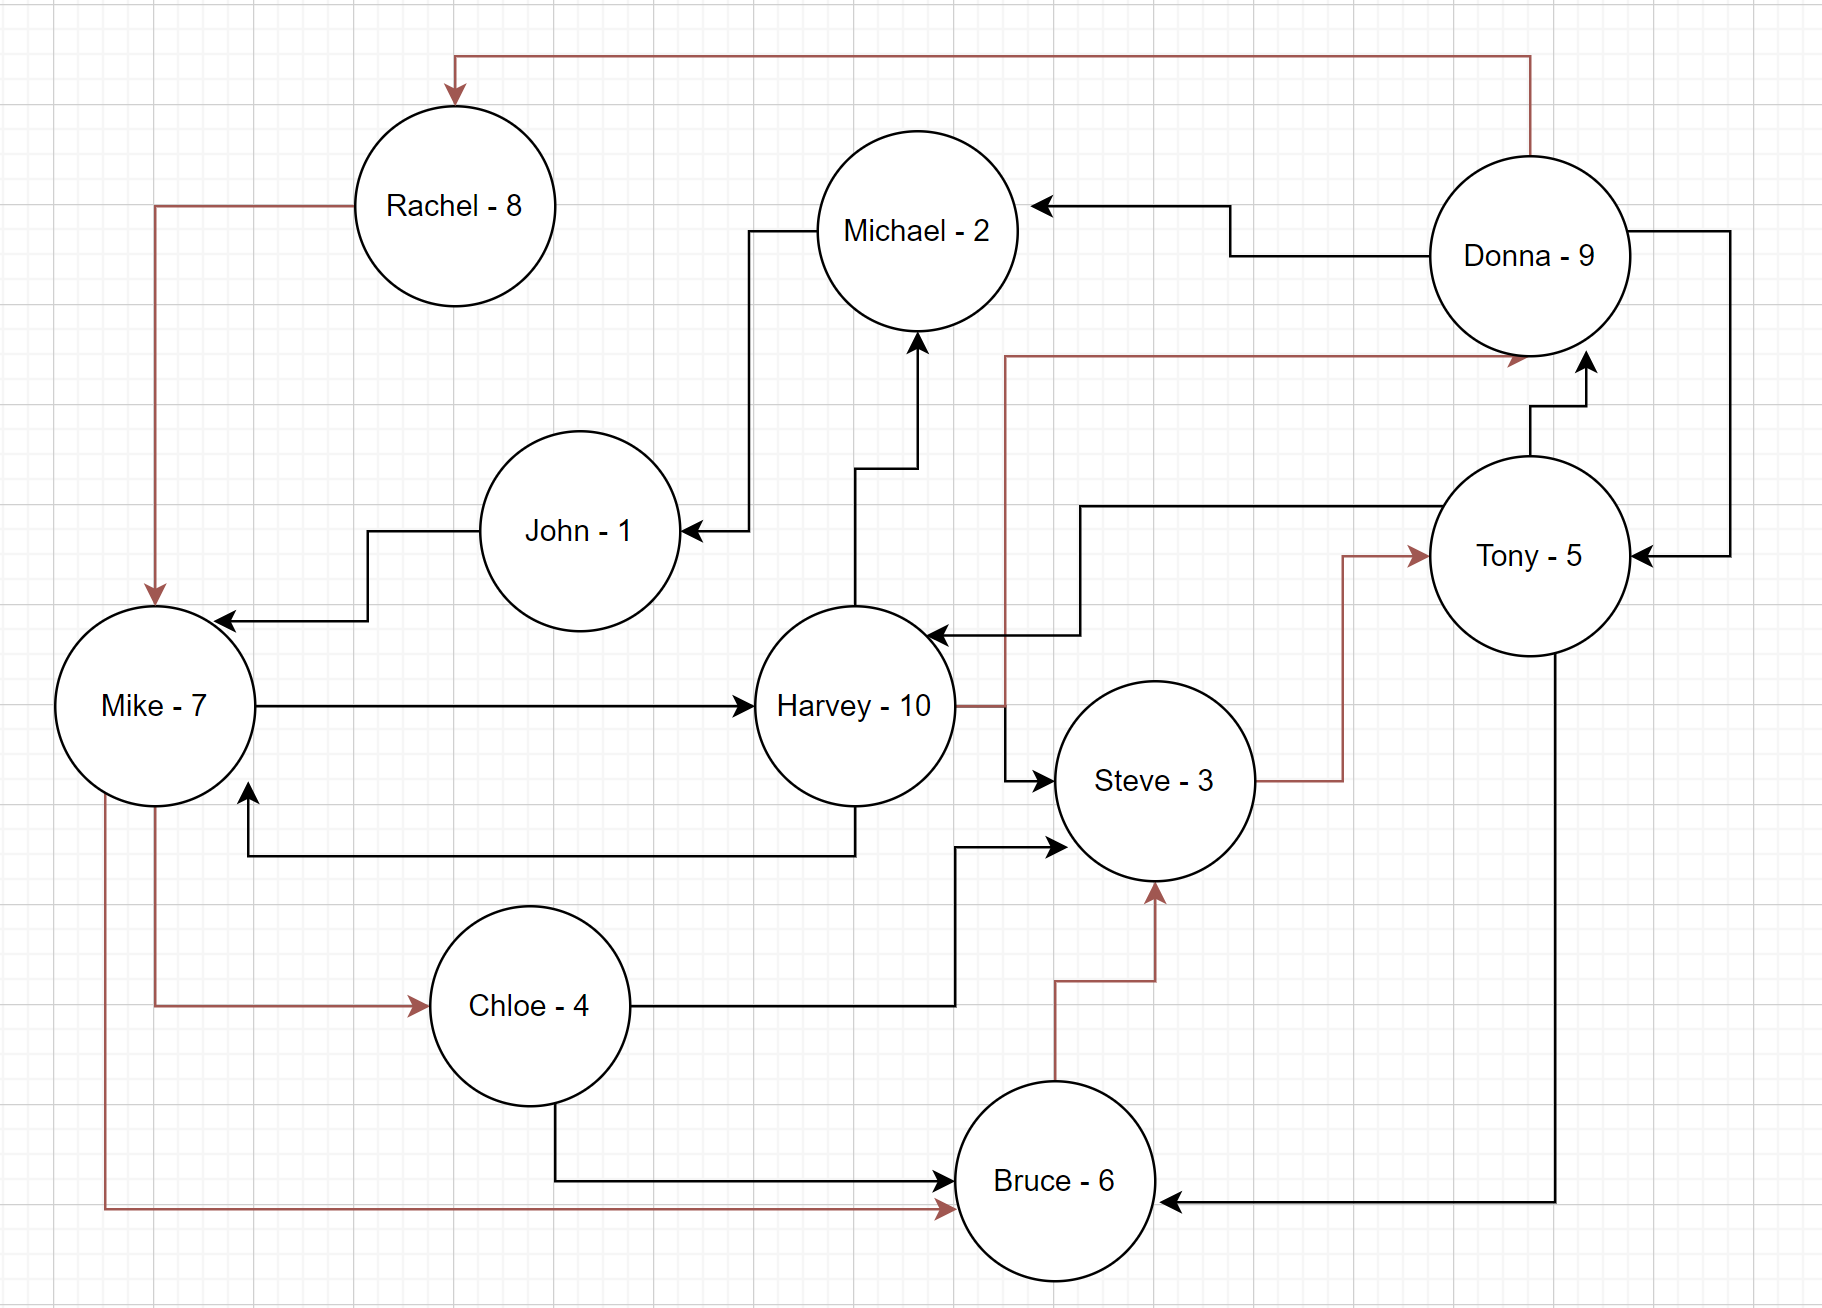